# Inaugural Project


> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [12]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%reload_ext autoreload
%autoreload 2

# Importing code with defined functions for solving the model
from inauguralproject import *

# Question 1

**We have solved the model by defining the given functions of the model, and calling an optimizer**

In [3]:
# i 
# the function that calculates the optimal insurance coverage is defined in the python file inaugural project, which is imported above.

# i.a defining given parameters for the various functions
# specify parameters in python file, otherwise there is a nameerror

# ii
# generating a grid with x values

N=100 #number of elements
x_min=0.01 #minimum value
x_max=0.9 #maximum value

x_values=np.linspace(x_min, x_max, N)

# iii 
#for each x, we now calculate the optimal insurance coverage

# generate grid for q values
q_star = np.empty(x_values.shape)

# solving the values for q, given the generated values of x
for i, x in enumerate(x_values):
    v = optimal(x, y, p)
    q_star[i] = v.x

We are now plotting the optimal insurance coverage.

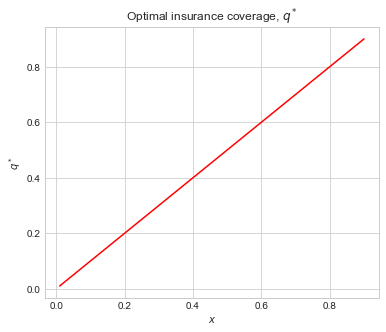

In [4]:
#iv 

fig = plt.figure(figsize=(6,5))

ax = fig.add_subplot(1,1,1)

ax.plot(x_values,q_star, color = 'red')

ax.set_title('Optimal insurance coverage, $q^*$')
ax.set_xlabel('$x$')
ax.set_ylabel('$q^*$')
ax.grid(True)

From this we can see, that the general solution to the agent’s problem is to set the insurance coverage equal to the monetary loss.

# Question 2

We are now going to find the set of acceptable contracts, where the expected value are the same for insured as not insured. 

In [5]:
# i
# we set x equal to 0.6
x = 0.6

N=100 #number of elements
q_min = 0.01 #minimum value
q_max = x #maximum value

q_values = np.linspace(q_min, q_max, N)

# grid to put the pis in
pis = np.zeros(N) 

# ii
# we first find the expected value for an uninsured person
V0 = uninsured_value(x, y, p)

# solving the values for pi, given the generated values of q
for i, q in enumerate(q_values):
    V = optimal_pi(q, x, y, p, V0)
    pis[i] = V.x

Now we plot the solution

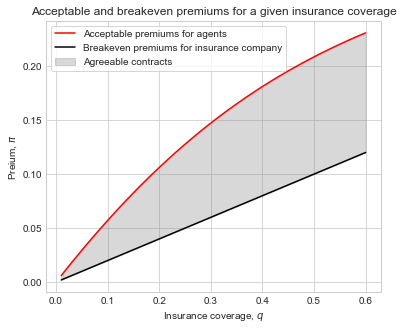

In [7]:
#iii

# generating the function pi, from the question before for each q
premiums = np.zeros(N)

for i, q in enumerate(q_values):
    premiums[i]=p*q

fig = plt.figure(figsize=(6, 5))

ax = fig.add_subplot(1,1,1)

ax.plot(q_values, pis, color = 'red', label = 'Acceptable premiums for agents')
ax.plot(q_values, premiums, color = 'black', label = 'Breakeven premiums for insurance company')
ax1=ax.fill_between(q_values, premiums, pis, alpha=.3, color = 'grey', label = 'Agreeable contracts')
ax.set_title('Acceptable and breakeven premiums for a given insurance coverage')
ax.set_xlabel('Insurance coverage, $q$')
ax.set_ylabel('Preium, $\pi$')
ax.legend(loc='upper left',frameon=True)
ax.grid(True)

The grey area represents the set of feasible contracts, in which the agennt finds the contracts acceptable and the insurance company finds the contracts profitable.

# Question 3

X is now drawn from a beta distribution.

In [8]:
# setting parameters
N = 10000
alpha = 2
beta = 7

# i 
# Monte carlo function is created and found i py file, parameters N, alpha and beta are also defined here. 

# ii
# first insurance policy: (gamma=0.9 and pi=0.2)
gamma1 = 0.9
pi1 = 0.2

value1 = monte_carlo(y, p, gamma1, pi1, N)
print(f'Expected utility of policy 1 is: {value1:.2f}')

# second insurane policy: (gamma=0.45 and pi=0.1)
gamma2 = 0.45
pi2 = 0.1

value2 = monte_carlo(y, p, gamma2, pi2, N)
print(f'Expected utility of policy 2 is: {value2:.2f}')

Expected utility of policy 1 is: -1.29
Expected utility of policy 2 is: -1.30


As expected utility of policy 1 is a bit higher than the expected utility of policy 2, policy 1 is preferable to the agent.

# Question 4

From the insurance companys point of view

In [21]:
# we first find the expected value for an uninsured person

#gamma = 0 #corresponds to no coverage
#pi = 0 # with no coverage there is no premium

U0 = monte_carlo(y, p, 0, 0, N)

gamma_a = 0.95

pi_optimal_c = float(optimal_pi_c(y, p, gamma_a, pi_guess_c, N, U0).x)

print(f'If the agent wants a insurance coverage of {gamma_a:.2f}, they will be willing to pay a maximum of {pi_optimal_c:.2f} in premium')

If the agent wants a insurance coverage of 0.95, they will be willing to pay a maximum of 0.24 in premium


ADD CONCISE CONLUSION.